In [34]:
from queue import Queue

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ete3
from ete3 import PhyloTree
from Bio import SeqIO

In [45]:
path_to_tree = "../data/example_birds/anc_kg.treefile"

tree = PhyloTree(path_to_tree, format=1)
# tree: PhyloTree = tree.search_nodes(name="Node626")[0]
tree.describe()

Number of leaf nodes:	764
Total number of nodes:	1526
Rooted:	No
Most distant node:	Crypturellus_undulatus
Max. distance:	0.447375


In [35]:
def node_parent(node):
    try:
        return next(node.iter_ancestors())
    except BaseException:
        return None

In [48]:
def iter_tree_edges(tree: PhyloTree):
    discovered_nodes = set()
    discovered_nodes.add(tree.name)
    Q = Queue()
    Q.put(tree)

    while not Q.empty():
        cur_node = Q.get()
        for child in cur_node.children:
            Q.put(child)

        if cur_node.name not in discovered_nodes:
            discovered_nodes.add(cur_node.name)
            alt_node = cur_node
            ref_node = node_parent(alt_node)
            yield ref_node, alt_node


dist = []
for ref_node, alt_node in iter_tree_edges(tree):
    d = ref_node.get_distance(alt_node)
    dist.append(d)

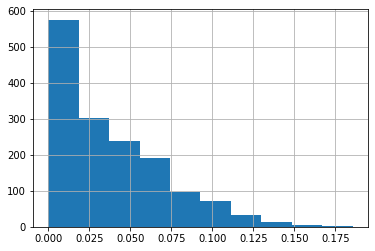

In [49]:
pd.Series(dist).hist();

In [40]:
edges

[('Node626', 'Node627'),
 ('Node626', 'Burhinus_bistriatus'),
 ('Node627', 'Node628'),
 ('Node627', 'Node631'),
 ('Node628', 'Node629'),
 ('Node628', 'Node630'),
 ('Node631', 'Node632'),
 ('Node631', 'Pluvialis_squatarola'),
 ('Node629', 'Charadrius_vociferus'),
 ('Node629', 'Charadrius_alexandrinus'),
 ('Node630', 'Vanellus_vanellus'),
 ('Node630', 'Vanellus_cinereus'),
 ('Node632', 'Node633'),
 ('Node632', 'Node634'),
 ('Node633', 'Recurvirostra_avosetta'),
 ('Node633', 'Himantopus_himantopus'),
 ('Node634', 'Haematopus_ostralegus'),
 ('Node634', 'Haematopus_ater')]

In [25]:
print(tree.get_ascii())


                            /-Charadrius_vociferus
                     /Node629
                    |       \-Charadrius_alexandrinus
              /Node628
             |      |       /-Vanellus_vanellus
             |       \Node630
             |              \-Vanellus_cinereus
             |
       /Node627                    /-Recurvirostra_avosetta
      |      |              /Node633
      |      |             |       \-Himantopus_himantopus
      |      |       /Node632
      |      |      |      |       /-Haematopus_ostralegus
-Node626      \Node631      \Node634
      |             |              \-Haematopus_ater
      |             |
      |              \-Pluvialis_squatarola
      |
       \-Burhinus_bistriatus
